In [1]:
!pip install pyyaml

In [2]:
import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

torch:  2.5 ; cuda:  cu121


In [3]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-ifkxn0p9
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-ifkxn0p9
  Resolved https://github.com/facebookresearch/detectron2.git to commit 9604f5995cc628619f0e4fd913453b4d7d61db3f
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.6 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp3

In [1]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import os,json,cv2,random
from google.colab.patches import cv2_imshow

from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.utils.visualizer import Visualizer
from detectron2 import model_zoo

In [3]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
pwd

'/content'

In [7]:
%cd drive/MyDrive/data_detectron2

/content/drive/MyDrive/data_detectron2


In [8]:
pwd

'/content/drive/MyDrive/data_detectron2'

In [9]:
!ls

output	output.json  train


In [10]:
%cd data_detectron2

[Errno 2] No such file or directory: 'data_detectron2'
/content/drive/MyDrive/data_detectron2


Register coco Instances

In [11]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("custom_train1",{},"./output.json","./train")

In [12]:
sample_Metadata = MetadataCatalog.get("custom_train1")
dataset_dicts = DatasetCatalog.get("custom_train1")

WARNING [01/18 14:41:16 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/18 14:41:16 d2.data.datasets.coco]: Loaded 290 images in COCO format from ./output.json


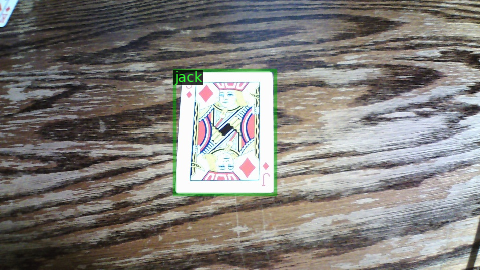

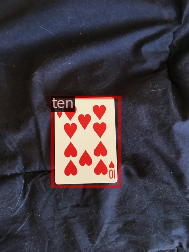

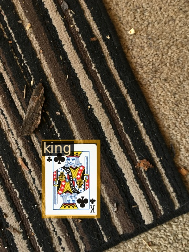

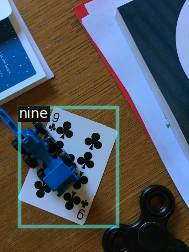

In [14]:
import random

for d in random.sample(dataset_dicts,4):
  img = cv2.imread(d["file_name"])
  visualizer = Visualizer(img[:,:,::-1],metadata=sample_Metadata,scale=0.5)
  vis = visualizer.draw_dataset_dict(d)
  cv2_imshow(vis.get_image()[:,:,::-1])

In [17]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

In [26]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("custom_train1",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1000
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 6

os.makedirs(cfg.OUTPUT_DIR,exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[01/18 15:23:27 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[01/18 15:23:28 d2.engine.train_loop]: Starting training from iteration 0
[01/18 15:23:37 d2.utils.events]:  eta: 0:07:18  iter: 19  total_loss: 2.742  loss_cls: 2.003  loss_box_reg: 0.7434  loss_rpn_cls: 0.005374  loss_rpn_loc: 0.005346    time: 0.4497  last_time: 0.4425  data_time: 0.0274  last_data_time: 0.0194   lr: 4.9953e-06  max_mem: 3975M
[01/18 15:23:47 d2.utils.events]:  eta: 0:07:31  iter: 39  total_loss: 2.591  loss_cls: 1.881  loss_box_reg: 0.7292  loss_rpn_cls: 0.002909  loss_rpn_loc: 0.00398    time: 0.4646  last_time: 0.4946  data_time: 0.0094  last_data_time: 0.0066   lr: 9.9902e-06  max_mem: 3978M
[01/18 15:23:56 d2.utils.events]:  eta: 0:07:37  iter: 59  total_loss: 2.345  loss_cls: 1.675  loss_box_reg: 0.7184  loss_rpn_cls: 0.008309  loss_rpn_loc: 0.004136    time: 0.4663  last_time: 0.5048  data_time: 0.0094  last_data_time: 0.0132   lr: 1.4985e-05  max_mem: 4115M
[01/18 15:24:04 d2.utils.events]:  eta: 0:07:00  iter: 79  total_loss: 2.071  loss_cls: 1.337  loss_bo

In [27]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR,"model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.DATASETS.TEST = ("custom_train1",)
predictor = DefaultPredictor(cfg)

[01/18 15:34:56 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


/usr/local/lib/python3.11/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

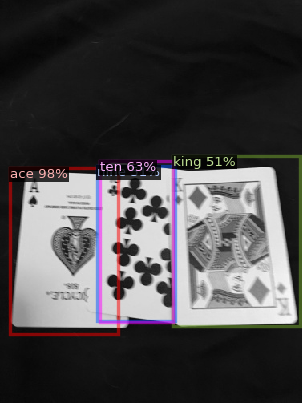

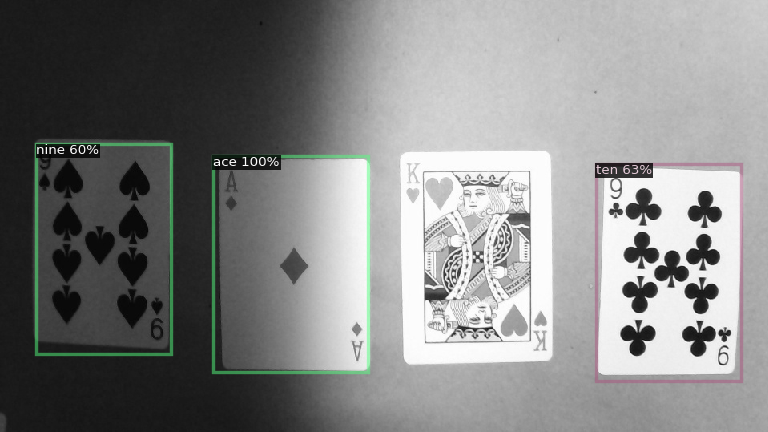

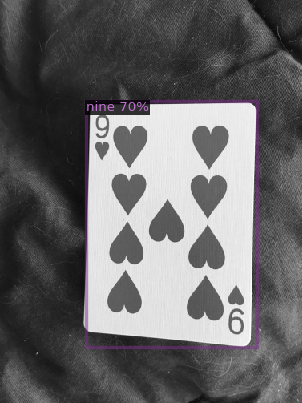

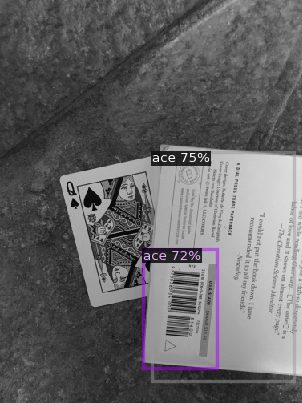

In [28]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 4):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=sample_Metadata,
                   scale=0.8,
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

In [30]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("custom_train1", output_dir= "./output")
val_loader = build_detection_test_loader(cfg, "custom_train1")
print(inference_on_dataset(predictor.model, val_loader, evaluator))

WARNING [01/18 15:37:31 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/18 15:37:31 d2.data.datasets.coco]: Loaded 290 images in COCO format from ./output.json
[01/18 15:37:31 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[01/18 15:37:31 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[01/18 15:37:31 d2.data.common]: Serializing 290 elements to byte tensors and concatenating them all ...
[01/18 15:37:31 d2.data.common]: Serialized dataset takes 0.07 MiB
[01/18 15:37:31 d2.evaluation.evaluator]: Start inference on 290 batches
[01/18 15:37:33 d2.evaluation.evaluator]: Inference done 11/290. Dataloading: 0.0014 s/iter. Inference: 0.1079 s/iter. Eval: 0.0002 s/iter. Total: 0.1095 s/iter. ETA=0:00:30
[01/18 15:37:38 d2.evaluation.evaluator]: Inference do